<a href="https://colab.research.google.com/github/memetics19/sms_spam_collection/blob/master/SMS_Spam_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the libraries 

In [196]:
import pandas as pd 
import seaborn as sns
import numpy as np
import string 
import re
import nltk 
from matplotlib import pyplot 
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:
doc = open("SMSSpamCollection").read()
doc[0:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [0]:
parsed_data=doc.replace('\t','\n').split('\n')

In [139]:
label_list=parsed_data[0::2]
msg_list=parsed_data[1::2]
print(label_list[0:5])
print(msg_list[0:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


# Read the Dataset 

In [0]:
df=pd.DataFrame({
    'label':label_list[:-1],
    'sms':msg_list
    
})

In [141]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
data=pd.read_csv("SMSSpamCollection",sep="\t",header=None)
data.columns=['label','sms']

In [143]:
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Shape of the Datasets 


In [144]:
print(f"input data as {len(data)} rows and {len(data.columns)} columns")

input data as 5572 rows and 2 columns


# Length of the ham and spam 

In [145]:
print(f'ham= {len(data[data["label"]=="ham"])}')

ham= 4825


In [146]:
print(f'spam= {len(data[data["label"]=="spam"])}')

spam= 747


Let's check for missing data

In [147]:
print(f"number of missing label = {data['label'].isnull().sum()}")
print(f"number of missing messages  = {data['sms'].isnull().sum()}")

number of missing label = 0
number of missing messages  = 0


# Removing the Punctuation 
Punctuation is present in the string library. Let's see the punctuations present in it.

In [148]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

using list comprehension feature removing the punctuation 

In [0]:
def rem_punctate(txt):
  txt_nopunt="".join([ c for c in txt if c not in string.punctuation])
  return txt_nopunt

In [0]:
data['sms_clean']=data['sms'].apply(lambda x: rem_punctate(x))

In [151]:
data.head()

,label,sms,sms_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


# Tokenization 
splitting text into list of words 


In [0]:
def tokenize(txt):
  tokens=re.split("\W+",txt)# "W+" is represented for non words and "+" represents one or more words
  return tokens

In [0]:
data["sms_clean_tokenized"]=data["sms_clean"].apply(lambda x:tokenize(x))

In [154]:
data.head()

,label,sms,sms_clean,sms_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


# Removing the stop words

stop words are the words are "is","the","am".. etc...

It should be removed because it will make the data less which is feasible for machine learning model 


In [0]:
stop_words=nltk.corpus.stopwords.words('english')

let's see 10 stop words 

In [156]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

let's see all the stopwords 

In [157]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
def rem_stopwords(txt_tokenized):
  txt_clean=[word for word in txt_tokenized if word not in stop_words]
  return txt_clean


In [0]:
data["sms_no_sw"]=data["sms_clean_tokenized"].apply(lambda x: rem_stopwords(x))

In [160]:
data.head()

,label,sms,sms_clean,sms_clean_tokenized,sms_no_sw
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


#Stemming
processing into root word by using porter stemmization algorithm 

In [0]:
ps=PorterStemmer()

In [0]:
def stemming(tokenized_text):
  text=[ps.stem(word) for word in tokenized_text]
  return text

In [0]:
data["stemmed_data"]=data["sms_no_sw"].apply(lambda x: stemming(x))

In [164]:
data.head()

,label,sms,sms_clean,sms_clean_tokenized,sms_no_sw,stemmed_data
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ..."


# Lemmatization
 using WordNet Lemmatization algorithm 
 

In [0]:
wn=nltk.WordNetLemmatizer()

In [0]:
def lemmatization(token_txt):
  text=[wn.lemmatize(word) for word in token_txt]
  return text

In [0]:
data['sms_tokenized']=data['sms_no_sw'].apply(lambda x:lemmatization(x))

In [168]:
data.head()

,label,sms,sms_clean,sms_clean_tokenized,sms_no_sw,stemmed_data,sms_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t..."


#Vectorization
using CountVectorization

In [0]:
cv=CountVectorizer(analyzer=lemmatization)

In [170]:
X = cv.fit_transform(data["sms_tokenized"])
print(X.shape)

(5572, 11043)


In [0]:
data_sample=data[0:100]
cv1=CountVectorizer(analyzer=lemmatization)

In [172]:
X=cv1.fit_transform(data_sample["sms_tokenized"])
print(X.shape)

(100, 745)


In [0]:
df=pd.DataFrame(X.toarray(), columns=cv1.get_feature_names())

In [174]:
df.head()

,,07732584351,0800,08000930705,08002986030,08452810075over18s,09061209465,09061701461,09066364589,1,100,1000,100000,10am9pm,11,12,150,1500,150moreFrmMob,150pday,150pm,16,169,186,2,20000,2005,21st,2nd,3,3AJ,4,4403LDNW1A7RW18,450Ppw,4txtú120,5000,5249,530,5month,6031,...,usf,usually,v,vaguely,valuable,valued,verify,waiting,want,wanted,wat,watching,watt,way,weak,week,weekend,well,wen,wet,whole,wif,win,wkly,wonderful,wont,word,work,world,worried,wun,wwwdbuknet,x,xxxmobilemovieclubcomnQJKGIGHJJGCBL,year,yesterday,yo,youd,youhow,ü
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


using  TF-IDF  Vectorization




In [210]:
tf = TfidfVectorizer(analyzer = lemmatization)

TypeError: ignored

In [176]:
data_sample=data[0:10]
X=tf.fit_transform(data_sample["sms_tokenized"])
print(X.shape)

(10, 136)


In [0]:
df=pd.DataFrame(X.toarray(), columns=tf.get_feature_names())

In [178]:
df.head()

,08002986030,08452810075over18s,09061701461,11,12,150,2,2005,21st,3,87121,9,900,As,Available,Call,Callers,Callertune,Cine,Claim,Co,Cup,Even,FA,FREE,Free,FreeMsg,Go,Had,Hey,I,Id,Joking,KL341,May,Melle,Minnaminunginte,Mobile,Nah,Nurungu,...,like,mobile,month,n,network,ok,oni,patent,per,point,prize,questionstd,rateTCs,rcv,receive,receivea,request,reward,say,selected,send,set,speak,std,still,think,though,tkts,treat,txt,u,usf,valued,wat,week,wif,win,wkly,word,world
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.25,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.25,0.0,0.000000,0.000000,0.000000,0.0,0.25
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.408248,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.408248,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.408248,0.000000,0.0,0.00,0.0,0.408248,0.000000,0.000000,0.0,0.00
2,0.0,0.193446,0.0,0.0,0.0,0.0,0.193446,0.193446,0.193446,0.0,0.193446,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.193446,0.0,0.386892,0.0,0.164447,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.193446,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.193446,0.193446,0.0,0.193446,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.193446,0.0,0.193446,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.193446,0.193446,0.0,0.00
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.000000,0.0,0.000000,0.000000,0.333333,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00


Using Hashing Vectorizer 



> Didn't Observe a good result 


In [0]:
hv = HashingVectorizer(analyzer = lemmatization, n_features=2**4)

In [212]:
X = hv.fit_transform(data["sms_tokenized"])
print(X.shape)

(5572, 16)


In [0]:
data_sample=data[0:100]
hv1=HashingVectorizer(analyzer=lemmatization)

In [214]:
X=hv1.fit_transform(data_sample["sms_tokenized"])
print(X.shape)

(100, 1048576)


In [0]:
df=pd.DataFrame(X.toarray())

In [216]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1048536,1048537,1048538,1048539,1048540,1048541,1048542,1048543,1048544,1048545,1048546,1048547,1048548,1048549,1048550,1048551,1048552,1048553,1048554,1048555,1048556,1048557,1048558,1048559,1048560,1048561,1048562,1048563,1048564,1048565,1048566,1048567,1048568,1048569,1048570,1048571,1048572,1048573,1048574,1048575
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering 

Feature Creation:  Message Length 

In [179]:
data['sms_length'] = data['sms'].apply(lambda x:len(x))
data.head()

,label,sms,sms_clean,sms_clean_tokenized,sms_no_sw,stemmed_data,sms_tokenized,sms_length
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n...",111
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",49
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...",61


Punctuation Usage

In [0]:
def punctuation_count(txt):
  count = sum([1 for c in txt if c in string.punctuation])
  return 100*count/len(txt)

In [222]:
data['punctuation_usage'] = data['sms'].apply(lambda x: punctuation_count(x))
data.head()

,label,sms,sms_clean,sms_clean_tokenized,sms_no_sw,stemmed_data,sms_tokenized,sms_length,punctuation_usage
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazy, Available, bugis, n...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]",29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155,3.870968
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, early, hor, U, c, already, say]",49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ...","[Nah, I, dont, think, go, usf, life, around, t...",61,3.278689


# Feature Evaluation

Plotting the Sms length of spam 



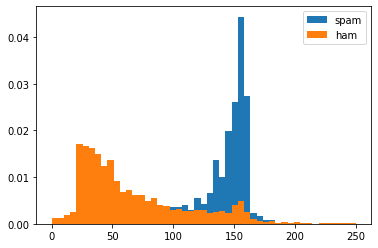

In [187]:
bin = np.linspace(0,250,50)
pyplot.hist(data[data['label'] =='spam']['sms_length'],bin,label = 'spam',density = True)
pyplot.hist(data[data['label'] =='ham']['sms_length'],bin,label = 'ham',density = True)
pyplot.legend(loc = 'upper right')
pyplot.show()

Finding the correlation using heatmap 

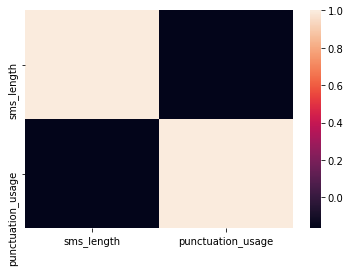

In [188]:
corr = data.corr()
sns.heatmap(corr)

Evaulate Punctuation 

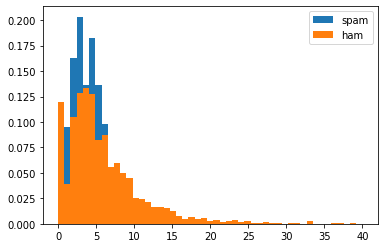

In [223]:
bin = np.linspace(0,40,50)
pyplot.hist(data[data['label'] =='spam']['punctuation_usage'],bin,label = 'spam',density = True)
pyplot.hist(data[data['label'] =='ham']['punctuation_usage'],bin,label = 'ham', density = True)
pyplot.legend(loc = 'upper right')
pyplot.show()

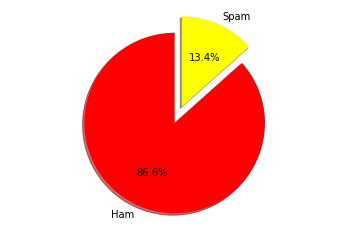

In [230]:
count_Class = pd.value_counts(data["label"], sort = True)   

labels = 'Ham', 'Spam'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'yellow']
explode = (0.1, 0.1)


pyplot.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
pyplot.axis('equal')
pyplot.show()

# Power Transformation 

Message length

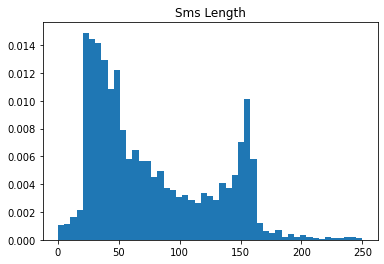

In [228]:
bin = np.linspace(0,250,50)
pyplot.hist(data['sms_length'],bin,density = True)
pyplot.title('Sms Length')
pyplot.show() # Bi modal graph 

Punctuation Usage

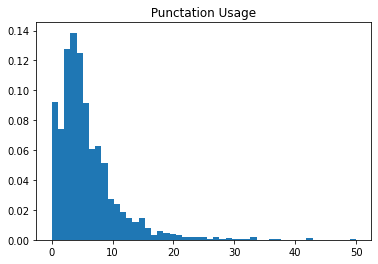

In [233]:
bin = np.linspace(0,50,50)
pyplot.hist(data['punctuation_usage'],bin,density = True)
pyplot.title(" Punctation Usage ")
pyplot.show()# Long Right tail not a complete U 

applying Transformation

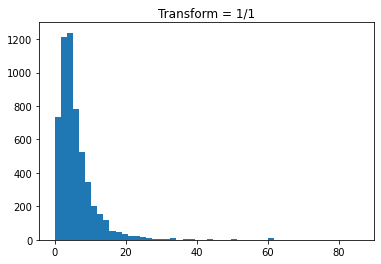

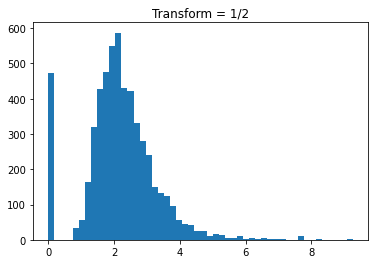

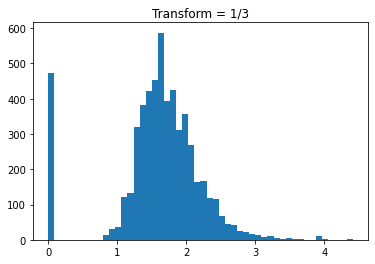

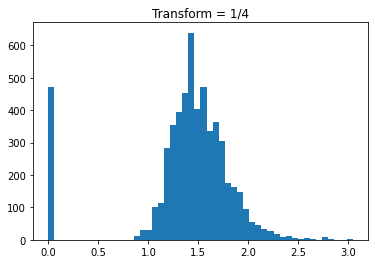

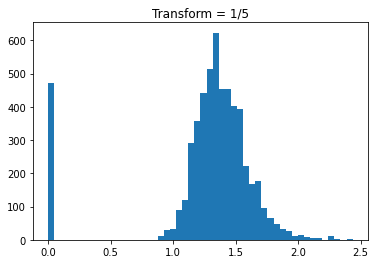

In [237]:
for i in [1, 2, 3, 4, 5]:
  pyplot.hist(data['punctuation_usage']**(1/i), bins = 50)
  pyplot.title(f'Transform = 1/{i}')
  pyplot.show()